<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1007 non-null   int64  
 1   url           1007 non-null   object 
 2   region        1007 non-null   object 
 3   region_url    1007 non-null   object 
 4   price         1006 non-null   float64
 5   year          969 non-null    float64
 6   manufacturer  909 non-null    object 
 7   model         971 non-null    object 
 8   condition     581 non-null    object 
 9   cylinders     653 non-null    object 
 10  fuel          966 non-null    object 
 11  odometer      976 non-null    float64
 12  title_status  936 non-null    object 
 13  transmission  979 non-null    object 
 14  VIN           636 non-null    object 
 15  drive         692 non-null    object 
 16  size          249 non-null    object 
 17  type          708 non-null    object 
 18  paint_color   775 non-null  

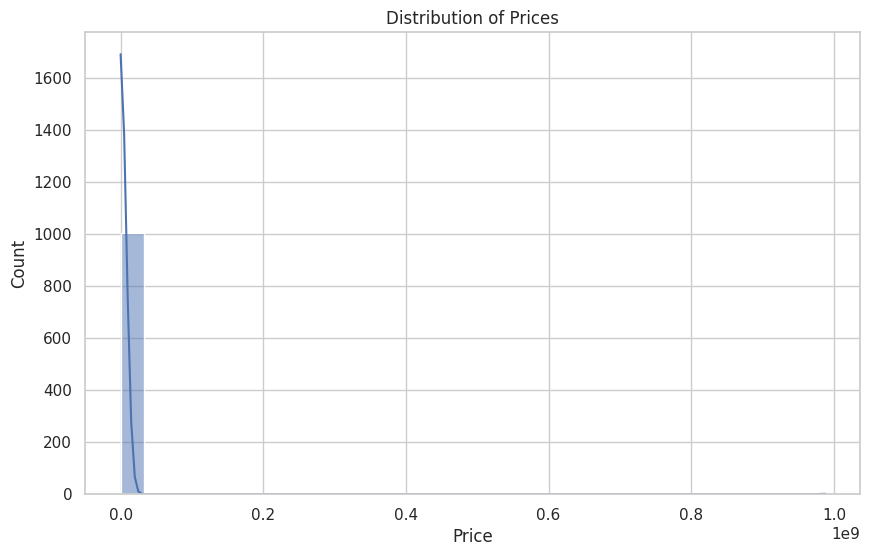

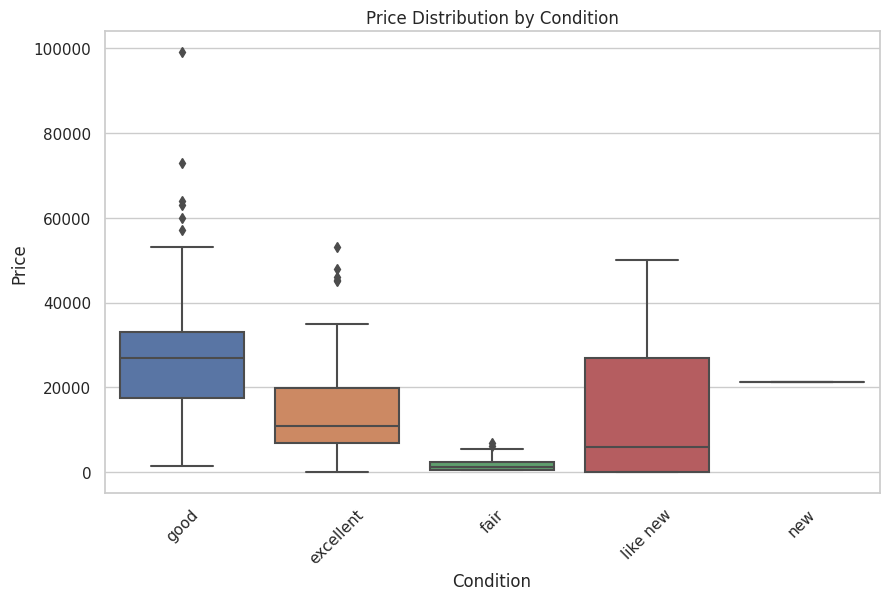

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "/content/vehicles.csv"
data = pd.read_csv(url)

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Summary statistics for numerical columns
print(data.describe())

# Count of unique values in categorical columns
print(data.nunique())

# Check for missing values
print(data.isnull().sum())

# Data visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Example: Histogram of prices
sns.histplot(data=data, x='price', bins=30, kde=True)
plt.xlabel('Price')
plt.title('Distribution of Prices')
plt.show()

# Example: Box plot of price vs. condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='condition', y='price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Price Distribution by Condition')
plt.xticks(rotation=45)
plt.show()

# Data preprocessing

# Handling missing values
# For example, drop rows with missing values in certain columns
data = data.dropna(subset=['price', 'year', 'manufacturer', 'model', 'condition'])

# Encoding categorical variables (one-hot encoding)
data = pd.get_dummies(data, columns=['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'state'], drop_first=True)

# Feature scaling (MinMax Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['price', 'year', 'odometer']] = scaler.fit_transform(data[['price', 'year', 'odometer']])

# Data splitting (train-test split)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
